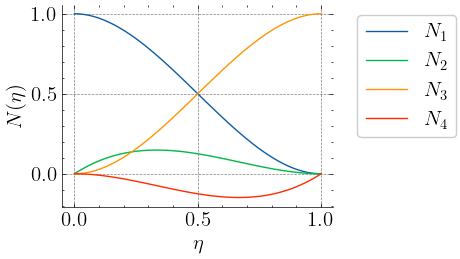

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Set up the plot configurations.
plt.rcParams['lines.linewidth'] = 2.0;
plt.rcParams['lines.color'] = 'black';
plt.rcParams['legend.frameon'] = True;
plt.rcParams['figure.figsize'] = (8, 6);
plt.rcParams['font.family'] = 'serif';
plt.rcParams['legend.fontsize'] = 15;
plt.rcParams['font.size'] = 15;
plt.rcParams['axes.spines.right'] = False;
plt.rcParams['axes.spines.top'] = False;
plt.rcParams['axes.spines.left'] = True;
plt.rcParams['axes.spines.bottom'] = True;
plt.rcParams['axes.axisbelow'] = True;
plt.rcParams['grid.color'] = 'grey';
plt.rcParams['grid.alpha'] = 0.6;
plt.rcParams['grid.linestyle'] = '--';

plt.style.use(['science', 'grid']);


fig,ax = plt.subplots(1,1);

# Define the x values
x = np.linspace(0, 1, 100);
# Define the shape functions - Hermite polynomials 4th order
N1 = 1 - 3*x**2 + 2*x**3;
N2 = x - 2*x**2 + x**3;
N3 = 3*x**2 - 2*x**3;
N4 = -x**2 + x**3;
# Plot the shape functions
ax.plot(x, N1, label='$N_1$');
ax.plot(x, N2, label='$N_2$');
ax.plot(x, N3, label='$N_3$');
ax.plot(x, N4, label='$N_4$');
# Add labels and legend
ax.set_xlabel(r'$\eta$');
ax.set_ylabel(r'$N(\eta)$');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left'); 

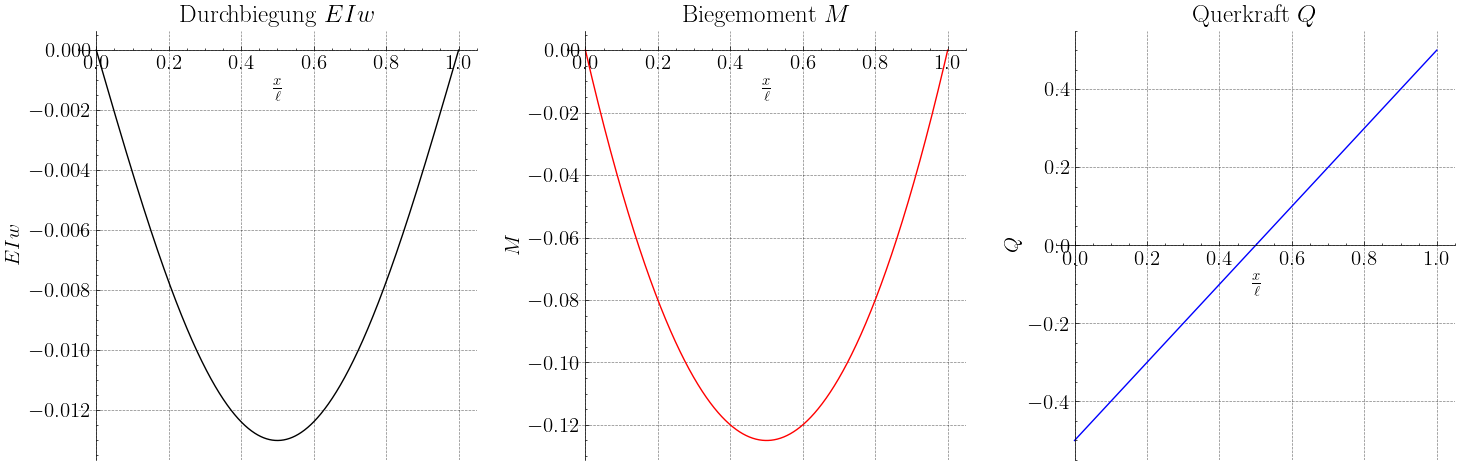

In [2]:
import sympy as sp
from sympy import Rational
from sympy import Eq
from sympy.plotting import plot, PlotGrid


x,EI,ell,q0,C_1,C_2,C_3,C_4 = sp.symbols('x,EI,ell,q0,C_1,C_2,C_3,C_4')

# Biegelinie
w = -1/EI*(Rational(1,24)*q0*x**4 +Rational(1,6)*C_1*x**3+Rational(1,2)*C_2*x**2+C_3*x+C_4)

# Bestimmung der Integrationskonstanten
eq1 = Eq(w.subs(x,0),0)
eq2 = Eq(w.subs(x,ell),0)
eq3 = Eq(w.diff(x,2).subs(x,0),0)
eq4 = Eq(w.diff(x,2).subs(x,ell),0)
solution = sp.solve((eq1,eq2,eq3,eq4),(C_1,C_2,C_3,C_4))

# Plot der Biegelinie und Schnittgrößen
wp = w.subs(solution).subs({"ell":1,"q0":1,"EI":1})
M = -wp.diff(x,2)
Q = -wp.diff(x,3)

p1= plot(wp,(x,0,1),title='Durchbiegung $EI w$',show=False,xlabel=r'$\frac{x}{\ell}$',ylabel='$EI w$',line_color='black')
p2= plot(M,(x,0,1),title='Biegemoment $M$',show=False,xlabel=r'$\frac{x}{\ell}$',ylabel='$M$',line_color='red')
p3= plot(Q,(x,0,1),title='Querkraft $Q$',show=False,xlabel=r'$\frac{x}{\ell}$',ylabel='$Q$',line_color='blue')


PlotGrid(1,3,p1,p2,p3,size=(15,5))